In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [55]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [57]:
print("iris_dataset의 키 :\n", iris_dataset.keys())

iris_dataset의 키 :
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [59]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [62]:
print("타겟의 이름 :", iris_dataset['target_names'])

타겟의 이름 : ['setosa' 'versicolor' 'virginica']


In [64]:
print("특성의 이름 :\n", iris_dataset['feature_names'])

특성의 이름 :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [70]:
print("data의 타입 :", type(iris_dataset['data']))

data의 타입 : <class 'numpy.ndarray'>


In [72]:
print("data의 크기 :", iris_dataset['data'].shape)

data의 크기 : (150, 4)


In [81]:
print("data의 처음 다섯 행 :\n", iris_dataset['data'][:5])

data의 처음 다섯 행 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [83]:
print("target의 타입 :", type(iris_dataset['target']))

target의 타입 : <class 'numpy.ndarray'>


In [85]:
print("target의 크기 :", iris_dataset['target'].shape)

target의 크기 : (150,)


In [88]:
print("target의 타깃 :\n", iris_dataset['target'])

target의 타깃 :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [92]:
print("X_train 크기 :", x_train.shape)
print("Y_train 크기 :", y_train.shape)

X_train 크기 : (112, 4)
Y_train 크기 : (112,)


In [94]:
print("X_test 크기 :", x_test.shape)
print("Y_test 크기 :", y_test.shape)

X_test 크기 : (38, 4)
Y_test 크기 : (38,)


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

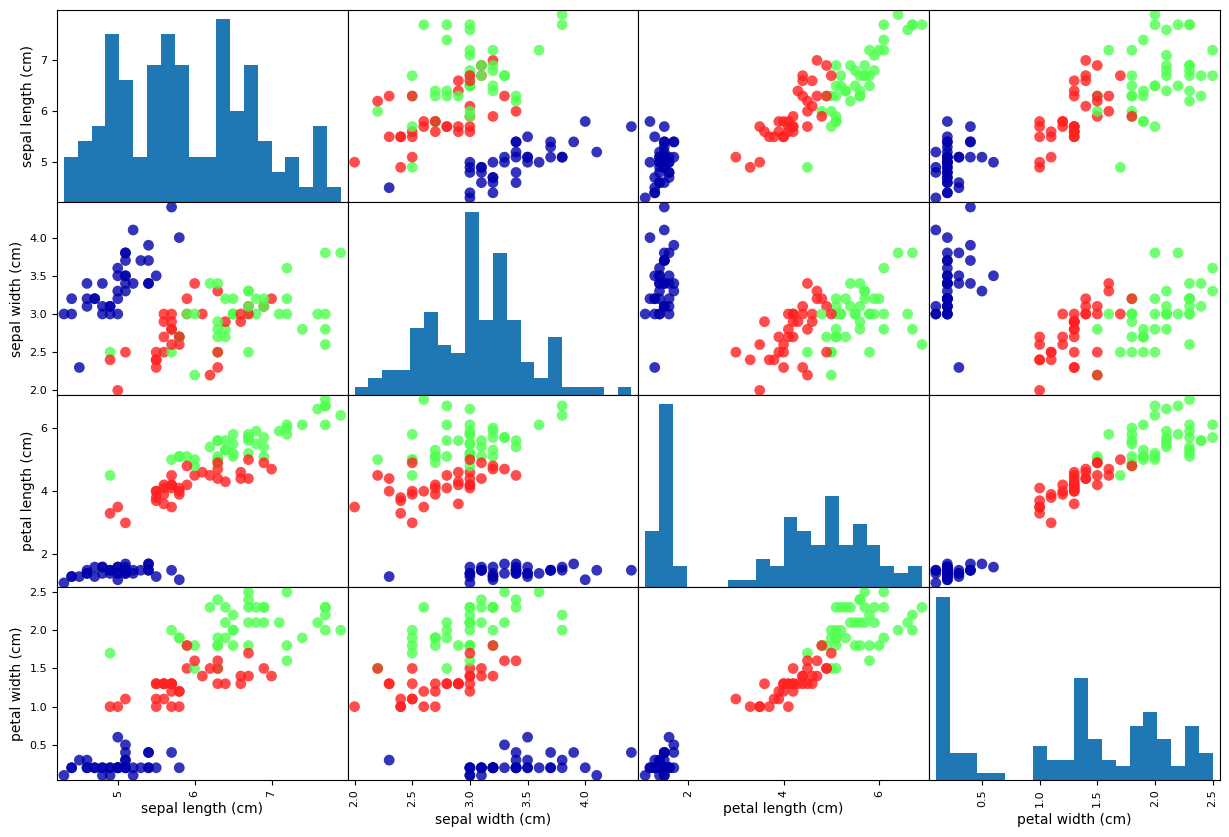

In [100]:
# x_train 데이터를 사용해서 데이터 프레임을 만든다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용한다.
iris_dataframe = pd.DataFrame(x_train, columns=iris_dataset.feature_names)
# 데이터 프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만든다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 10), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)   # 이웃을 한 개만 사용한다.

In [105]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

예측하기

In [107]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape :", X_new.shape)

X_new.shape : (1, 4)


In [108]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타겟의 이름:",
      iris_dataset['target_names'][prediction])

예측: [0]
예측한 타겟의 이름: ['setosa']


모델 평가하기

In [110]:
y_pred = knn.predict(x_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [111]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 0.97
